# Part 1 : preparing dataset for time series analysis.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [3]:
import glob

folder = "Data/"
crime_files = sorted(glob.glob(folder+"*.csv"))
df = pd.concat([pd.read_csv(f) for f in crime_files])
df

,ID,Date,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
0,1326041,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
1,1319931,01/01/2001 01:00:00 PM,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2,1324743,01/01/2001 01:00:00 PM,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
3,1310717,01/01/2001 01:00:00 AM,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
4,1318099,01/01/2001 01:00:00 AM,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...,...
238853,12938029,12/31/2022 12:50:00 PM,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
238854,12937822,12/31/2022 12:50:00 PM,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
238855,12937583,12/31/2022 12:52:00 AM,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098
238856,12938420,12/31/2022 12:52:00 PM,ASSAULT,SIMPLE,COMMERCIAL / BUSINESS OFFICE,False,False,1432,14.0,32.0,41.930693,-87.685657


In [4]:
# set datetime index
df['Date'] = pd.to_datetime(df['Date'])
# set Date as an index
df = df.set_index('Date')
df

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude
Date,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841
2001-01-01 13:00:00,1324743,GAMBLING,ILLEGAL ILL LOTTERY,STREET,True,False,313,3.0,NaN,41.780412,-87.611970
2001-01-01 01:00:00,1310717,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2424,24.0,NaN,42.012391,-87.678032
2001-01-01 01:00:00,1318099,BATTERY,SIMPLE,RESIDENCE PORCH/HALLWAY,False,True,214,2.0,NaN,41.819538,-87.620020
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 12:50:00,12938029,ASSAULT,SIMPLE,APARTMENT,False,False,1014,10.0,24.0,41.855911,-87.719966
2022-12-31 12:50:00,12937822,ASSAULT,AGGRAVATED - HANDGUN,APARTMENT,False,True,733,7.0,6.0,41.766546,-87.645669
2022-12-31 00:52:00,12937583,BATTERY,SIMPLE,BARBERSHOP,False,False,1135,11.0,28.0,41.868829,-87.686098


In [5]:
## Inspect the value_counts for the different types of crimes
crime_counts = df['Primary Type'].value_counts().to_frame('Total # of Crimes')
crime_counts

,Total # of Crimes
THEFT,1626992
BATTERY,1410889
CRIMINAL DAMAGE,878914
NARCOTICS,746155
ASSAULT,501103
OTHER OFFENSE,479174
BURGLARY,422246
MOTOR VEHICLE THEFT,366586
DECEPTIVE PRACTICE,340958
ROBBERY,289677


In [6]:
# get the total counts for each crime (Each row is 1 day)

## get list of  unique crime descriptions
crime_list = df['Primary Type'].unique()

# Create an empty dictionary  
CRIMES = {}

# Loop through the list of crimes
for crime in crime_list:
    # Save a temp df of just the rows that match the crime
    temp = df.loc[ df['Primary Type']==crime].copy()
    # Resample the temp DataFrame as Daily data (crime counts) and keep ONLY the .size() 
    temp_res = temp.resample("D").size() 
    # Save the temporary DataFrame in the dictionary, using the crime Primary Type as the key.
    CRIMES[crime] = temp_res.copy() 

# Convert Dictionary to DataFrame
crimes_ts = pd.DataFrame(CRIMES)
crimes_ts

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-01,296,2.0,233,100,412,70,97,38.0,94,32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-02,143,1.0,118,4,221,66,175,2.0,78,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-03,165,0.0,136,3,226,79,133,7.0,49,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-04,173,2.0,133,5,243,57,142,2.0,42,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001-01-05,178,0.0,142,9,265,68,185,6.0,53,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,76,NaN,64,4,147,47,9,NaN,40,12,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
2022-12-28,102,NaN,78,3,112,44,12,NaN,38,17,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
2022-12-29,97,NaN,95,3,137,38,15,NaN,38,11,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [7]:
# filling null values in crimes_ts with 0 
crimes_ts = crimes_ts.fillna(0)

## Topic 1) Comparing Police Districts

- Which district had the most crimes in 2022?
- Which had the least?

In [8]:
# obtain the counts of crimes for each discrit in 2022 
crime_count = df.loc['2022'].groupby('District')['Primary Type'].count()
# Sort from highest to lowest
crime_count.sort_values(ascending = False)

District
8.0     14805
6.0     14694
12.0    14341
4.0     13931
11.0    13457
1.0     13044
18.0    12429
19.0    12243
25.0    11951
3.0     11937
2.0     11793
9.0     10376
7.0     10319
10.0     9961
5.0      9773
16.0     9226
24.0     8469
15.0     8308
14.0     8158
22.0     7671
17.0     6997
20.0     4960
31.0       15
Name: Primary Type, dtype: int64

-  Which district had the most crimes in 2022?
   - 8
-  Which had the least?
   - 31

## Topic 2) Crimes Across the Years:
-   Is the total number of crimes increasing or decreasing across the years?
-   ?
Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-vers
  a)?

In [9]:
# resample total crimes by year using sum as aggregate
crimes_ts_year = crimes_ts.resample('Y').sum()
crimes_ts_year 

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-12-31,93461,934.0,55859,2263,99277,31384,50567,1779.0,14949,4277,...,8.0,1.0,19.0,6.0,9.0,1.0,0.0,0.0,0.0,0.0
2002-12-31,94153,971.0,55941,2594,98332,31523,51789,1807.0,13732,4281,...,2.0,0.0,26.0,5.0,8.0,0.0,0.0,0.0,0.0,0.0
2003-12-31,88380,1088.0,55011,3047,98876,29477,54288,1571.0,13459,4211,...,2.0,0.0,16.0,2.0,6.0,0.0,1.0,0.0,0.0,0.0
2004-12-31,87136,1122.0,53164,3099,95463,28850,57060,1538.0,13255,4298,...,1.0,0.0,13.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0
2005-12-31,83964,1078.0,54548,2906,85684,27067,56234,1521.0,13590,4106,...,2.0,0.0,19.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
2006-12-31,80666,1368.0,57124,2783,86240,25945,55813,1439.0,13606,3821,...,7.0,0.0,17.0,9.0,4.0,0.0,0.0,0.0,0.0,0.0
2007-12-31,79593,1409.0,53749,2921,85156,26313,54454,1507.0,14170,3554,...,1.0,0.0,12.0,12.0,5.0,0.0,0.0,0.0,0.0,0.0
2008-12-31,75930,1199.0,52843,2661,88437,25448,46506,1515.0,14933,3877,...,0.0,0.0,13.0,12.0,4.0,0.0,0.0,0.0,0.0,0.0
2009-12-31,68460,991.0,47725,2632,80976,22861,43542,1401.0,13877,4159,...,0.0,0.0,21.0,7.0,10.0,0.0,1.0,0.0,0.0,0.0


<Axes: xlabel='Date'>

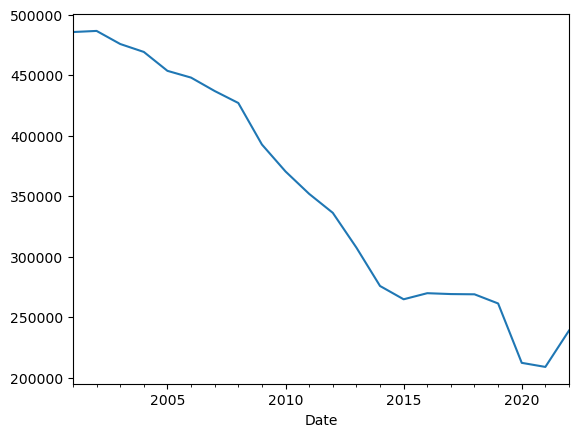

In [10]:
# plot the total number of crimes across the years
crimes_ts_year.sum(axis=1).plot()

Q1 : Is the total number of crimes increasing or decreasing across the years?

- overall the number of crimes is decreasing across the years

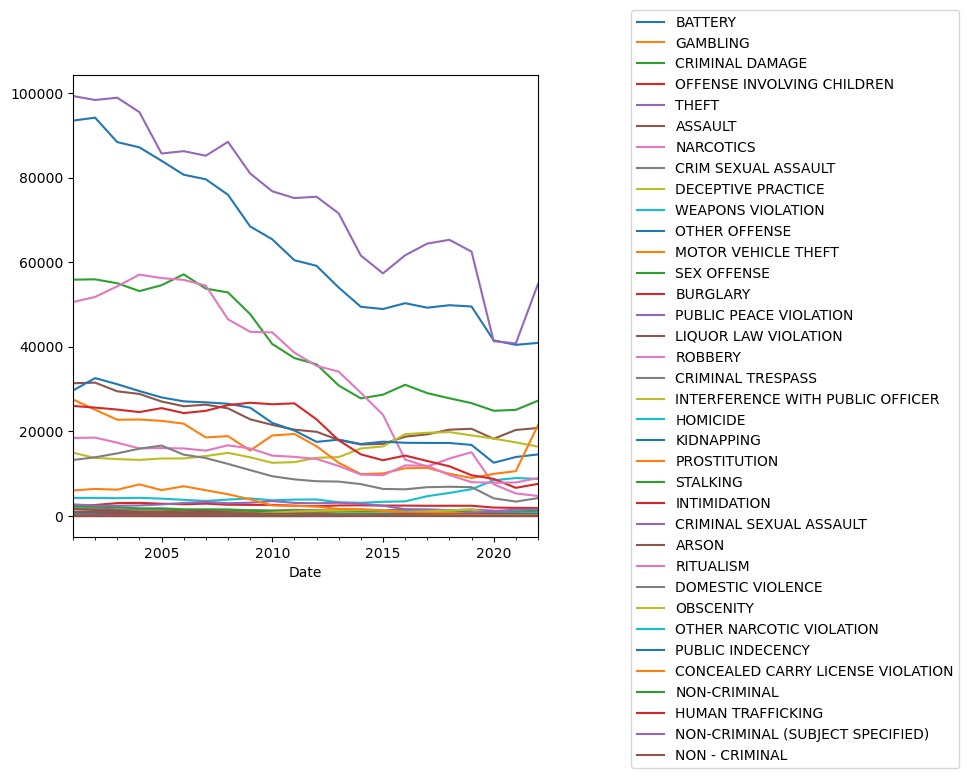

In [11]:
# plot the number of each crime across the years
fig, ax= plt.subplots(figsize = (6,6))
crimes_ts_year.plot(ax=ax)
ax.legend(loc=(1.2, -0.5))

Q2 : Are there any individual crimes that are doing the opposite (e.g., decreasing when overall crime is increasing or vice-vers a)?
- it seems that crimes with primary type'other narcotic violation' are slightly increasing from 2016

## Topic 3) Comparing AM vs. PM Rush Hour:

-  Are crimes more common during AM rush hour or PM rush hour
    -  You can consider any crime that occurred between 7 AM - 10 AM as AM rush ho
    -  You can consider any crime that occurred between 4 - 7 PM as PM rush ho

- Answer the question: ​What are the top 5 most common crimes during AM rush hour? What are the top 5 most common crimes during PM rush h
- Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?

In [12]:
# make a copy of the original data 
df_copy = df.copy()
# create a column with just the hour
df_copy['hour']= df_copy.index.hour
df_copy.head(2)

,ID,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Latitude,Longitude,hour
Date,,,,,,,,,,,,
2001-01-01 01:00:00,1326041,BATTERY,SIMPLE,RESIDENCE,False,False,1624,16.0,NaN,41.957850,-87.749185,1
2001-01-01 13:00:00,1319931,BATTERY,SIMPLE,RESIDENCE,False,True,825,8.0,NaN,41.783892,-87.684841,13


In [13]:
# Filter crimes occured in AM rush hour
AM_rush_hour = df_copy['hour'].isin(range(7,11))
# Filter crimes occured in PM rush hour
PM_rush_hour = df_copy['hour'].isin(range(16,20))

In [28]:
# Obtain the number of crimes occured in AM rush hours
len(df_copy[AM_rush_hour])

1097647

In [29]:
# Obtain the number of crimes occured in PM rush hours 
len(df_copy[PM_rush_hour])

1641051

Q1-a: Are crimes more common during AM rush hour or PM rush hour?
- it seems that crimes are more common during PM rush hour 

In [30]:
# Obtain the number of crimes occured in AM rush hours grouped by their type
df_copy[AM_rush_hour].groupby('Primary Type').size().sort_values(ascending = False)

Primary Type
THEFT                                260759
BATTERY                              158475
CRIMINAL DAMAGE                      109089
BURGLARY                              96219
OTHER OFFENSE                         89870
DECEPTIVE PRACTICE                    80006
ASSAULT                               73636
NARCOTICS                             67032
MOTOR VEHICLE THEFT                   54035
CRIMINAL TRESPASS                     30493
ROBBERY                               26337
PROSTITUTION                          12215
OFFENSE INVOLVING CHILDREN             8835
WEAPONS VIOLATION                      8435
PUBLIC PEACE VIOLATION                 5460
SEX OFFENSE                            5005
CRIM SEXUAL ASSAULT                    2567
KIDNAPPING                             1649
INTERFERENCE WITH PUBLIC OFFICER       1380
ARSON                                  1139
HOMICIDE                               1133
STALKING                                928
INTIMIDATION       

In [18]:
# Obtain the number of crimes occured in PM rush hours grouped by their type
df_copy[PM_rush_hour].groupby('Primary Type').size().sort_values(ascending = False)

Primary Type
THEFT                                379122
BATTERY                              288003
CRIMINAL DAMAGE                      183423
NARCOTICS                            164754
ASSAULT                              118179
OTHER OFFENSE                         98687
BURGLARY                              78604
MOTOR VEHICLE THEFT                   74678
ROBBERY                               61775
DECEPTIVE PRACTICE                    58973
CRIMINAL TRESPASS                     48564
WEAPONS VIOLATION                     20485
OFFENSE INVOLVING CHILDREN            13278
PUBLIC PEACE VIOLATION                12135
PROSTITUTION                           8125
SEX OFFENSE                            5865
GAMBLING                               4905
INTERFERENCE WITH PUBLIC OFFICER       4403
LIQUOR LAW VIOLATION                   4168
CRIM SEXUAL ASSAULT                    3874
HOMICIDE                               2227
KIDNAPPING                             2092
ARSON              

Q2-a: What are the top 5 most common crimes during AM rush hour? 
- THEFT, BATTERY, CRIMINAL DAMAGE, BURGLARY, OTHER OFFENSE

Q2-b:What are the top 5 most common crimes during PM rush hour?
- THEFT, BATTERY, CRIMINAL DAMAGE, NARCOTICS, ASSAULT

Q3: Answer the question: ​Are Motor Vehicle Thefts more common during AM rush hour or PM Rush Hour?
- The number of MOTOR VEHICLE THEFT crimes is more common in PM rush hour (74678 in PM rush hour compared to 54035 in AM rush hour).

## Part 2 : Compare the crime count forecast for Theft & Narcotics

In [39]:
# Transform the data to obtain a time series of the crime count per month using .size()

## get list of  unique crime descriptions
crime_list = df['Primary Type'].unique()

# Create an empty dictionary  
CRIMES = {}

# Loop through the list of crimes
for crime in crime_list:
    # Save a temp df of just the rows that match the crime
    temp = df.loc[ df['Primary Type']==crime].copy()
    # Resample the temp DataFrame as Daily data (crime counts) and keep ONLY the .size() 
    temp_res = temp.resample("M").size() 
    # Save the temporary DataFrame in the dictionary, using the crime Primary Type as the key.
    CRIMES[crime] = temp_res.copy() 

# Convert Dictionary to DataFrame
crimes_ts_M = pd.DataFrame(CRIMES)
crimes_ts_M

,BATTERY,GAMBLING,CRIMINAL DAMAGE,OFFENSE INVOLVING CHILDREN,THEFT,ASSAULT,NARCOTICS,CRIM SEXUAL ASSAULT,DECEPTIVE PRACTICE,WEAPONS VIOLATION,...,RITUALISM,DOMESTIC VIOLENCE,OBSCENITY,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,CONCEALED CARRY LICENSE VIOLATION,NON-CRIMINAL,HUMAN TRAFFICKING,NON-CRIMINAL (SUBJECT SPECIFIED),NON - CRIMINAL
Date,,,,,,,,,,,,,,,,,,,,,
2001-01-31,6527,44.0,3966,246,7867,2123,4714,162.0,1398,337,...,2.0,1.0,2,1,NaN,NaN,NaN,NaN,NaN,NaN
2001-02-28,6042,37.0,3665,152,6669,2029,4369,134.0,1163,301,...,0.0,NaN,1,0,1.0,NaN,NaN,NaN,NaN,NaN
2001-03-31,7662,55.0,4617,195,7766,2824,4862,149.0,1313,345,...,2.0,NaN,2,0,0.0,NaN,NaN,NaN,NaN,NaN
2001-04-30,8328,79.0,4922,196,7702,2746,4044,132.0,1199,321,...,1.0,NaN,2,0,1.0,NaN,NaN,NaN,NaN,NaN
2001-05-31,8887,94.0,4757,213,8420,2903,4038,155.0,1261,390,...,1.0,NaN,1,2,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-31,3740,2.0,2713,188,5244,1984,420,NaN,1432,832,...,NaN,NaN,6,1,1.0,15.0,0.0,1.0,NaN,NaN
2022-09-30,3723,NaN,2619,156,5117,1891,379,NaN,1540,780,...,NaN,NaN,7,2,1.0,13.0,0.0,0.0,NaN,NaN
2022-10-31,3501,NaN,2834,146,5242,1839,358,NaN,1568,735,...,NaN,NaN,8,0,1.0,10.0,2.0,2.0,NaN,NaN


In [40]:
# Check for null values.
crimes_ts_M.isna().sum()

BATTERY                                0
GAMBLING                               4
CRIMINAL DAMAGE                        0
OFFENSE INVOLVING CHILDREN             0
THEFT                                  0
ASSAULT                                0
NARCOTICS                              0
CRIM SEXUAL ASSAULT                   34
DECEPTIVE PRACTICE                     0
WEAPONS VIOLATION                      0
OTHER OFFENSE                          0
MOTOR VEHICLE THEFT                    0
SEX OFFENSE                            0
BURGLARY                               0
PUBLIC PEACE VIOLATION                 0
LIQUOR LAW VIOLATION                   0
ROBBERY                                0
CRIMINAL TRESPASS                      0
INTERFERENCE WITH PUBLIC OFFICER       0
HOMICIDE                               0
KIDNAPPING                             0
PROSTITUTION                           0
STALKING                               0
INTIMIDATION                           0
CRIMINAL SEXUAL 

In [41]:
# Address null values.
crimes_ts_M = crimes_ts_M.fillna(0)
# confirm changes
crimes_ts_M.isna().sum()

BATTERY                              0
GAMBLING                             0
CRIMINAL DAMAGE                      0
OFFENSE INVOLVING CHILDREN           0
THEFT                                0
ASSAULT                              0
NARCOTICS                            0
CRIM SEXUAL ASSAULT                  0
DECEPTIVE PRACTICE                   0
WEAPONS VIOLATION                    0
OTHER OFFENSE                        0
MOTOR VEHICLE THEFT                  0
SEX OFFENSE                          0
BURGLARY                             0
PUBLIC PEACE VIOLATION               0
LIQUOR LAW VIOLATION                 0
ROBBERY                              0
CRIMINAL TRESPASS                    0
INTERFERENCE WITH PUBLIC OFFICER     0
HOMICIDE                             0
KIDNAPPING                           0
PROSTITUTION                         0
STALKING                             0
INTIMIDATION                         0
CRIMINAL SEXUAL ASSAULT              0
ARSON                    

In [42]:
# required imports for time series forcasting
import statsmodels.tsa.api as tsa
from pmdarima.model_selection import train_test_split
from pmdarima.arima.utils import ndiffs, nsdiffs

# Set wide fig size for plots
plt.rcParams['figure.figsize']=(12,3)



### defining custom function for time series forcasting

In [44]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d, 
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags, 
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])

In [45]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5), 
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},  
                  annotate_seas=False, m = None,
                 seas_color='black'):
    
    fig, axes = plt.subplots(nrows=2, figsize=figsize)

    
    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)
    
    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)
    
    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)



    
    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m 

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)
        
        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()
    
    return fig

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics


In [68]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None, 
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)
            
    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index, 
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();
    
    return fig, ax


### Theft crime forcasting

In [92]:
# Theft crime time series
ts_theft = crimes_ts_M['THEFT']
ts_theft

Date
2001-01-31    7867
2001-02-28    6669
2001-03-31    7766
2001-04-30    7702
2001-05-31    8420
              ... 
2022-08-31    5244
2022-09-30    5117
2022-10-31    5242
2022-11-30    4717
2022-12-31    4413
Freq: M, Name: THEFT, Length: 264, dtype: int64

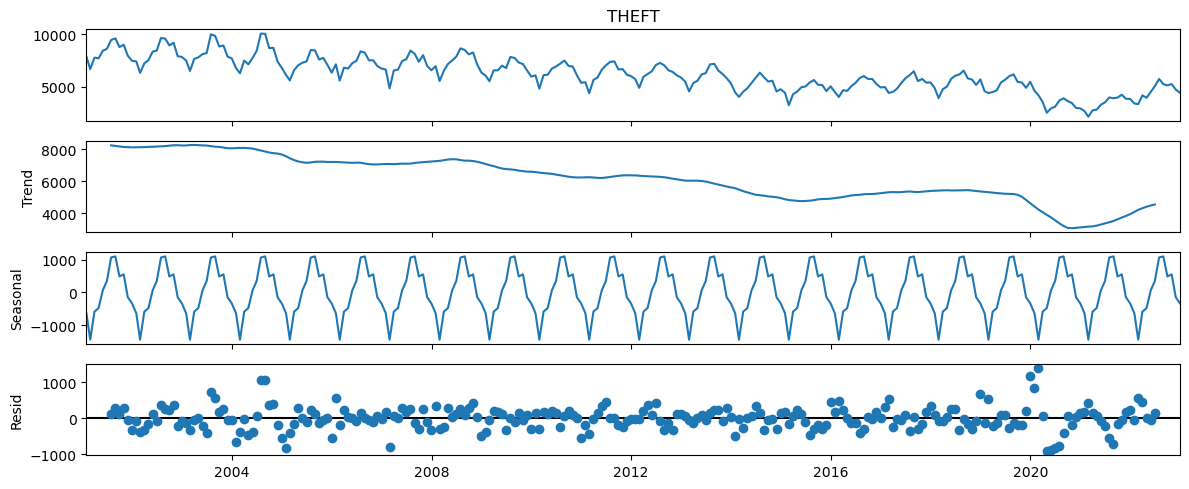

In [48]:
# Apply seasonal decomposition
decomp = tsa.seasonal_decompose(ts_theft)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

it seems that there is a seasonality for theft crime count

In [49]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts_theft.max()-ts_theft.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  2549.99 which is ~32.08% of the variation in time series.


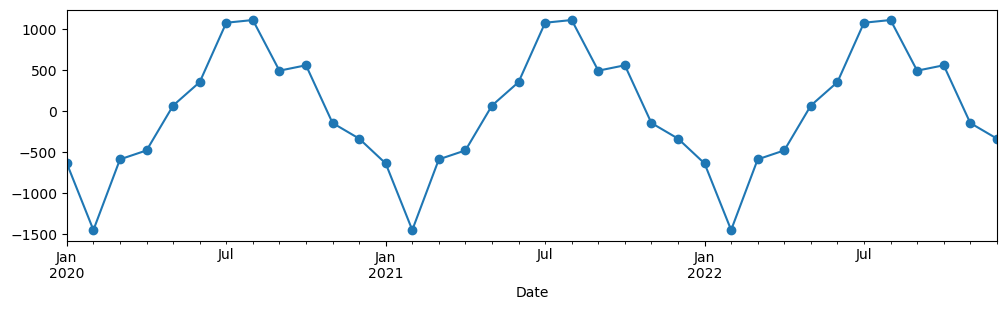

In [50]:
# Narrow down the date range of the plot to determine the period of the seasonal component
seasonal = decomp.seasonal
ax = seasonal.loc['2020':].plot(marker = 'o')

- We will use a seasonal model.
- The seasonal period is 12, so we will use m = 12.

In [52]:
# Check for stationarity to Determine if nonseasonal and/or seasonal differencing is required
get_adfuller_results(ts_theft)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,-1.393935,13,250,0.58518,0.05,False


In [56]:
# use ndiffs and nsdiffs to determine values for d and D.
## determine d
d = ndiffs(ts_theft)
print (f'd = {d}')
## determine D
D = nsdiffs(ts_theft, m = 12)
print (f'D = {D}')

d = 1
D = 0


In [59]:
# apply non seasonal differencing
ts_theft_diff = ts_theft.diff().dropna()

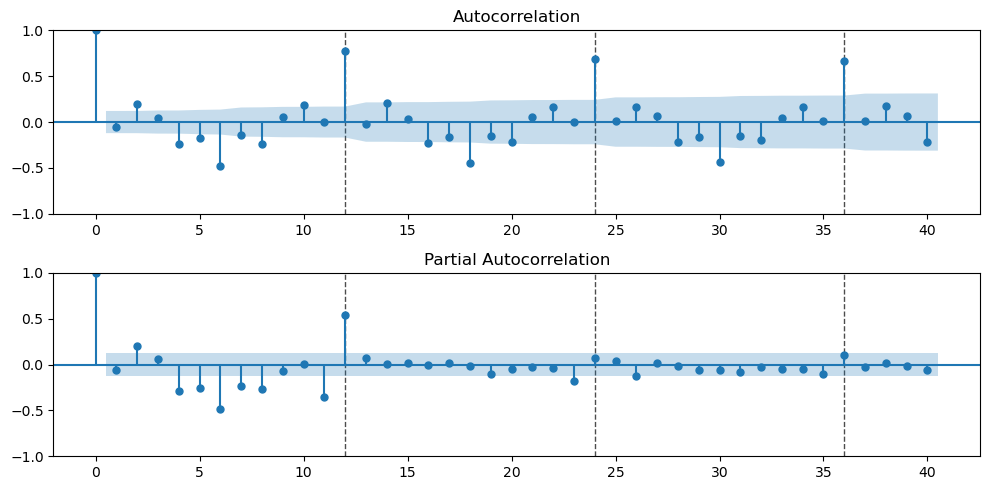

In [62]:
# Plot the acf/pacf of the stationary data
plot_acf_pacf(ts_theft_diff, annotate_seas = True, m = 12, nlags = 40);

Based on the ACF & PCF, we will start with our first seasonal model: (1,1,1)(1,0,0)

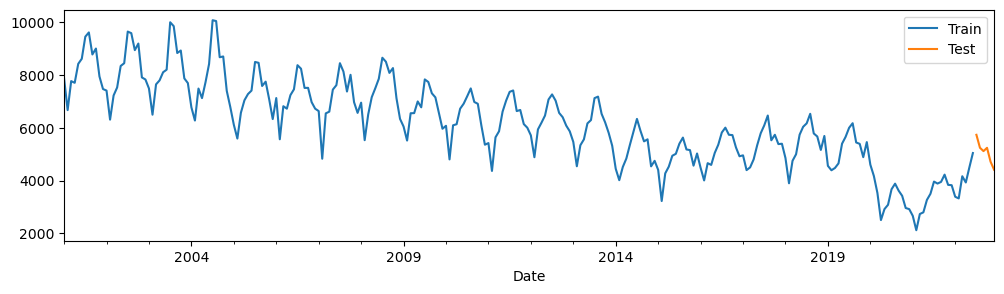

In [63]:
# Split the time series into training and test data
train, test = train_test_split(ts_theft, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

#### Fit a manual ARIMA/SARIMA model based on the orders determined during exploration.

In [64]:
# Define the Time Series Model Orders and Fit the model to the training data

## Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

## Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()


In [65]:
# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             THEFT   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1897.686
Date:                           Fri, 21 Jun 2024   AIC                           3803.371
Time:                                   18:32:09   BIC                           3817.567
Sample:                               01-31-2001   HQIC                          3809.080
                                    - 06-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9640      0.171     -5.636      0.000      -1.299      -0.629
ma.L1          0.9701      0.155      6.267      0.000       0.667       1.274
ar.S.L12       0.7794      0.029     26.848      0.000       0.722       0.836
sigma2      1.376e+05   1.04e+04     13.255      0.000    1.17e+05    1.58e+05
===================================================================================
Ljung-Box (L1) (Q):                   9.32   Jarque-Bera (JB):                 4.44
Prob(Q):                              0.00   Prob(JB):                         0.11
Heteroskedasticity (H):               0.72   Skew:                            -0.07
Prob(H) (two-sided):                  0.13   Kurtosis:                         3.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

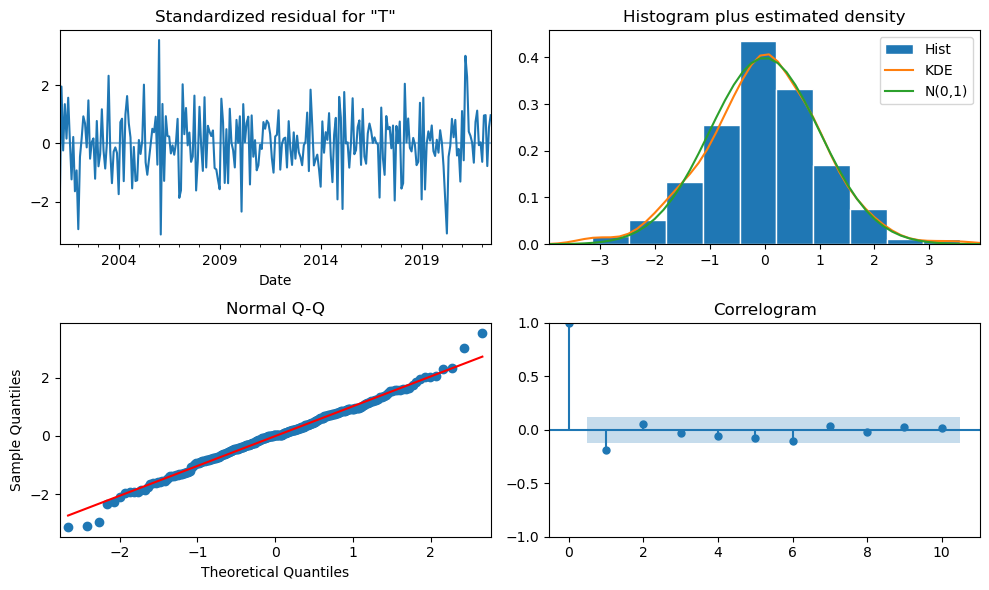

In [66]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 424.992
- MSE = 243,329.356
- RMSE = 493.284
- R^2 = -0.379
- MAPE = 8.77%


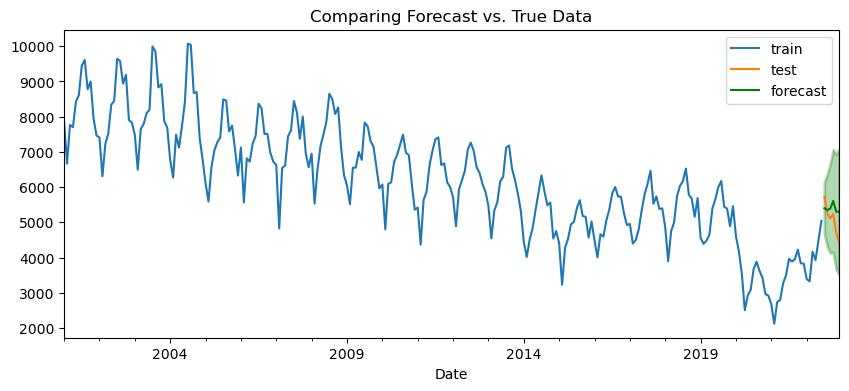

In [70]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Evaluate Model Performance
regression_metrics_ts(test, forecast_df["mean"])

#### Tune with pmdarima's auto_arima

In [71]:
import pmdarima as pm
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.69 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=4050.524, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3791.710, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3914.631, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=4048.603, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=4050.805, Time=0.05 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3774.214, Time=0.58 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3743.907, Time=1.23 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3743.960, Time=0.61 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3742.900, Time=1.29 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3870.719, Time=0.61 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3913.736, Time=0.28 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3754.859, Time=1.14 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

The Best model obtained by grid search is:  ARIMA(1,1,0)(1,0,2)[12] 

In [73]:
# Try auto_arima orders
auto_sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                       
=============================================================================================
Dep. Variable:                                 THEFT   No. Observations:                  258
Model:             ARIMA(1, 1, 0)x(1, 0, [1, 2], 12)   Log Likelihood               -1865.634
Date:                               Fri, 21 Jun 2024   AIC                           3741.268
Time:                                       18:41:21   BIC                           3759.013
Sample:                                   01-31-2001   HQIC                          3748.404
                                        - 06-30-2022                                         
Covariance Type:                                 opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2251      0.046     -4.934      0.000      -0.315      -0.136
ar.S.L12       0.9778      0.008    120.048      0.000       0.962       0.994
ma.S.L12      -0.5771      0.059     -9.815      0.000      -0.692      -0.462
ma.S.L24      -0.1202      0.068     -1.758      0.079      -0.254       0.014
sigma2      1.038e+05   7353.299     14.120      0.000    8.94e+04    1.18e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                30.54
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            -0.44
Prob(H) (two-sided):                  0.31   Kurtosis:                         4.44
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 211.162
- MSE = 72,806.759
- RMSE = 269.827
- R^2 = 0.587
- MAPE = 4.27%


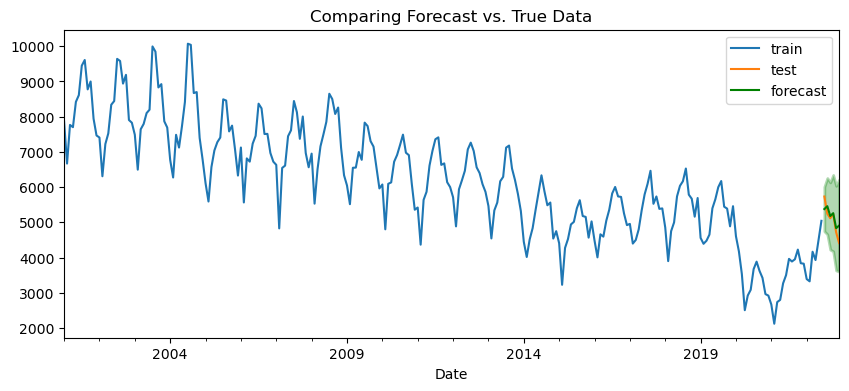

In [74]:
# Obtain summary of forecast as dataframe
forecast_df_auto = auto_sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df_auto)
# Evaluate Model Performance
regression_metrics_ts(test, forecast_df_auto["mean"])

#### Select the final model and justify your choice

Manual model metrics AIC and BIC diagnostic :

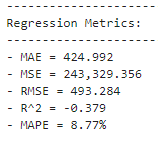  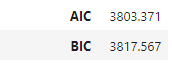


Tuned model metrics & AIC and BIC diagnostic : 

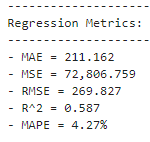  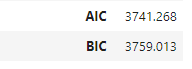

The tuned medel has lower MAPE, AIC and BIC value. Also visually, the tuned model perform better.

#### Make true future forecasts using the entire dataset

In [82]:
# Fit a final model on the entire time series

final_p = 1
final_q = 1
final_d = 0
final_P = 1
final_Q = 0
final_D = 2
m = 12

# Fit the ARIMA model
final_model = tsa.ARIMA(
    ts_theft,
    order=(final_p, final_d, final_q),
    seasonal_order=(final_P, final_D, final_Q, m),
).fit()

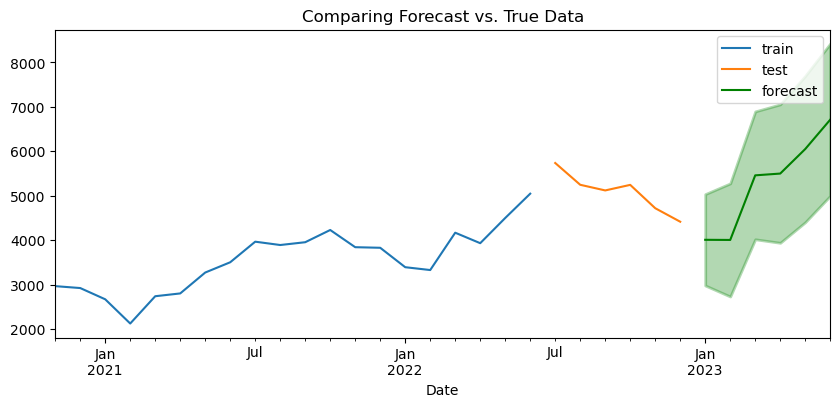

In [84]:
# Ger forecast into true future (fit on entrie time series)
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df, n_train_lags = 20);

#### Calculate Summary Metrics for Stakeholder

In [89]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The predicted net change in the number (raw counts) of Theft crime from the beginning of the forecast to the end {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')

The predicted net change in the number (raw counts) of Theft crime from the beginning of the forecast to the end  2702.53.
The percentage change is 67.46%.


### Narcotics crime forcasting

In [90]:
ts_narcotics = crimes_ts_M['NARCOTICS']
ts_narcotics

Date
2001-01-31    4714
2001-02-28    4369
2001-03-31    4862
2001-04-30    4044
2001-05-31    4038
              ... 
2022-08-31     420
2022-09-30     379
2022-10-31     358
2022-11-30     339
2022-12-31     325
Freq: M, Name: NARCOTICS, Length: 264, dtype: int64

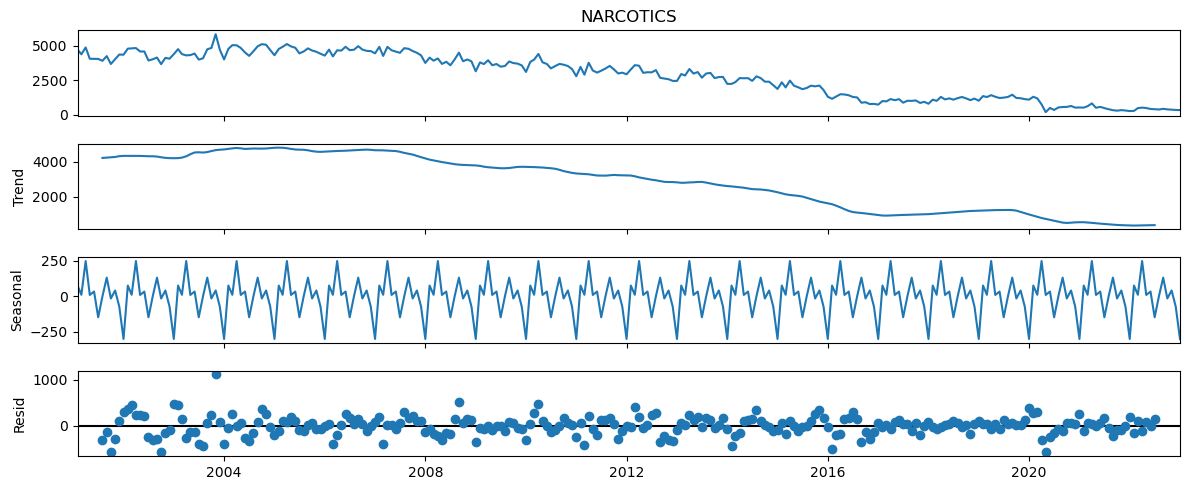

In [91]:
# Decompose the Time series to detect seasonality and decide whether to use a seasonal model or not
decomp = tsa.seasonal_decompose(ts_narcotics)
fig = decomp.plot()
fig.set_size_inches(12,5)
fig.tight_layout()

In [95]:
# How big is the seasonal component
seasonal_delta = decomp.seasonal.max() - decomp.seasonal.min()

# How big is the seasonal component relative to the time series?
print(f"The seasonal component is {seasonal_delta: .2f} which is ~{seasonal_delta/(ts_narcotics.max()-ts_narcotics.min()) * 100 :.2f}% of the variation in time series.")

The seasonal component is  550.66 which is ~9.76% of the variation in time series.


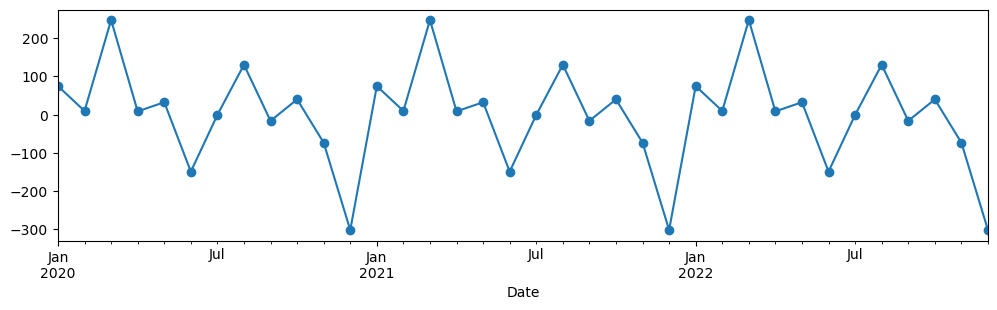

In [94]:
# Narrow down the date range of the plot to determine the period of the seasonal component
seasonal = decomp.seasonal
ax = seasonal.loc['2020':].plot(marker = 'o')

We will use a seasonal model.
The seasonal period is 12, so we will use m = 12.

In [96]:
# Check for stationarity to Determine if nonseasonal and/or seasonal differencing is required
get_adfuller_results(ts_narcotics)

,Test Statistic,# of Lags Used,# of Observations,p-value,alpha,sig/stationary?
adfuller,0.265472,12,251,0.975704,0.05,False


In [97]:
# use ndiffs and nsdiffs to determine values for d and D.
## determine d
d = ndiffs(ts_narcotics)
print (f'd = {d}')
## determine D
D = nsdiffs(ts_narcotics, m = 12)
print (f'D = {D}')

d = 1
D = 0


In [98]:
# apply non seasonal differencing
ts_narcotics_diff = ts_narcotics.diff().dropna()

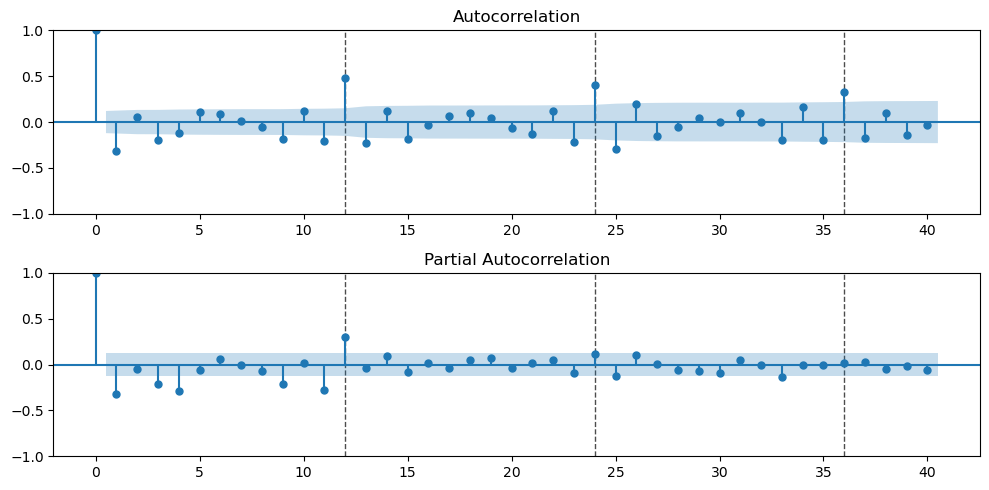

In [99]:
# Plot the acf/pacf of the stationary data
plot_acf_pacf(ts_narcotics_diff, annotate_seas = True, m = 12, nlags = 40);

- p & q : The ACF & PACF show a gradual drop 
- P & Q : The ACF show a gradual drop whereas the PACF show a dramatic drop
- we will start with our first seasonal model: (1,1,1)(1,0,0)[12]

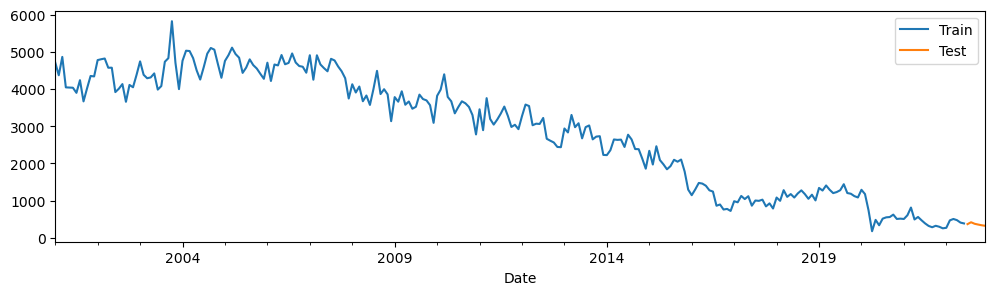

In [101]:
# Split the time series into training and test data
train, test = train_test_split(ts_narcotics, test_size=6)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

#### Fit a manual ARIMA/SARIMA model based on the orders determined during exploration.


In [103]:
# Define the Time Series Model Orders and Fit the model to the training data

## Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 1  # nonseasonal MA

## Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 12 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                         NARCOTICS   No. Observations:                  258
Model:             ARIMA(1, 1, 1)x(1, 0, [], 12)   Log Likelihood               -1778.793
Date:                           Fri, 21 Jun 2024   AIC                           3565.587
Time:                                   19:29:47   BIC                           3579.783
Sample:                               01-31-2001   HQIC                          3571.296
                                    - 06-30-2022                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5096      0.082      6.245      0.000       0.350       0.669
ma.L1         -0.8290      0.057    -14.431      0.000      -0.942      -0.716
ar.S.L12       0.4893      0.049      9.889      0.000       0.392       0.586
sigma2      5.968e+04   4037.216     14.783      0.000    5.18e+04    6.76e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):                33.71
Prob(Q):                              0.79   Prob(JB):                         0.00
Heteroskedasticity (H):               0.38   Skew:                            -0.07
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

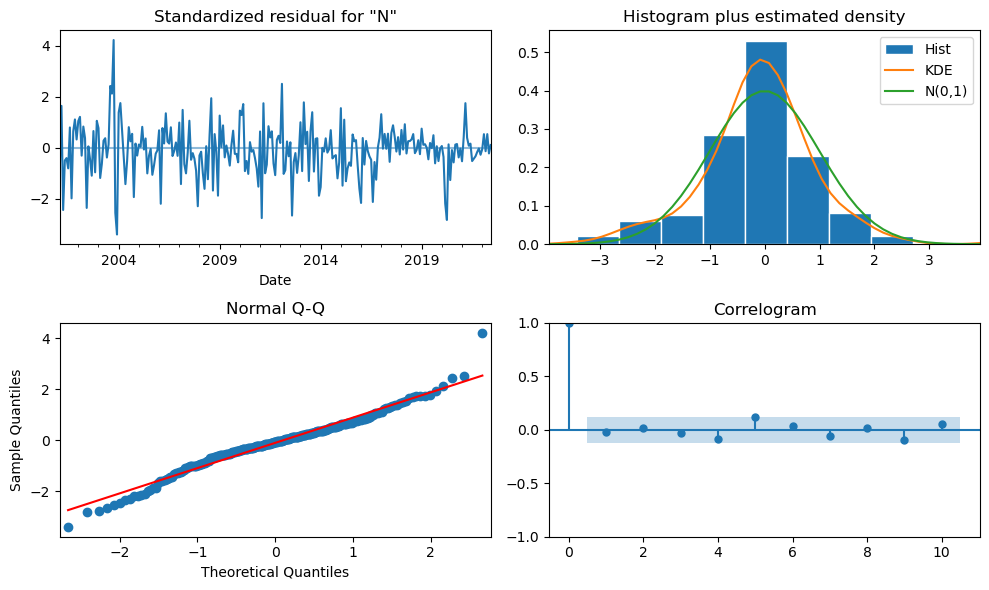

In [104]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 73.631
- MSE = 6,293.880
- RMSE = 79.334
- R^2 = -5.779
- MAPE = 19.87%


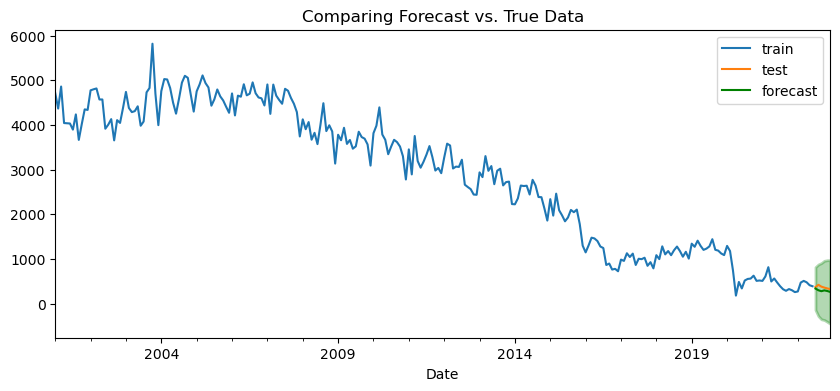

In [105]:
# Obtain summary of forecast as dataframe
forecast_df = sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df)
# Evaluate Model Performance
regression_metrics_ts(test, forecast_df["mean"])

#### Tune with pmdarima's auto_arima

In [106]:
# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,  # True or False
    m=12,  # if seasonal
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=0.74 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=3669.016, Time=0.02 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=3583.957, Time=0.28 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=3595.909, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=3667.813, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=3643.189, Time=0.03 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=3577.354, Time=0.66 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=3559.635, Time=1.27 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=3559.679, Time=0.57 sec
 ARIMA(1,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=1.90 sec
 ARIMA(1,1,0)(1,0,2)[12] intercept   : AIC=3559.353, Time=1.29 sec
 ARIMA(1,1,0)(0,0,2)[12] intercept   : AIC=3589.825, Time=0.54 sec
 ARIMA(1,1,0)(0,0,1)[12] intercept   : AIC=3602.922, Time=0.24 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=3566.692, Time=1.05 sec
 ARIMA(2,1,0)(1,0,2)[12] inte

In [107]:
# Try auto_arima orders
auto_sarima = tsa.ARIMA(train, order = auto_model.order, seasonal_order=auto_model.seasonal_order).fit()

# Obtain summary
auto_sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          NARCOTICS   No. Observations:                  258
Model:             ARIMA(4, 1, 0)x(1, 0, [1], 12)   Log Likelihood               -1764.670
Date:                            Fri, 21 Jun 2024   AIC                           3543.341
Time:                                    19:33:05   BIC                           3568.184
Sample:                                01-31-2001   HQIC                          3553.332
                                     - 06-30-2022                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2524      0.042     -5.976      0.000      -0.335      -0.170
ar.L2         -0.1862      0.053     -3.528      0.000      -0.290      -0.083
ar.L3         -0.2032      0.058     -3.488      0.000      -0.317      -0.089
ar.L4         -0.1967      0.061     -3.247      0.001      -0.315      -0.078
ar.S.L12       0.9384      0.032     29.749      0.000       0.877       1.000
ma.S.L12      -0.7208      0.081     -8.953      0.000      -0.879      -0.563
sigma2      5.296e+04   3683.359     14.379      0.000    4.57e+04    6.02e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                38.52
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.33   Skew:                            -0.39
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 34.565
- MSE = 1,829.463
- RMSE = 42.772
- R^2 = -0.970
- MAPE = 9.88%


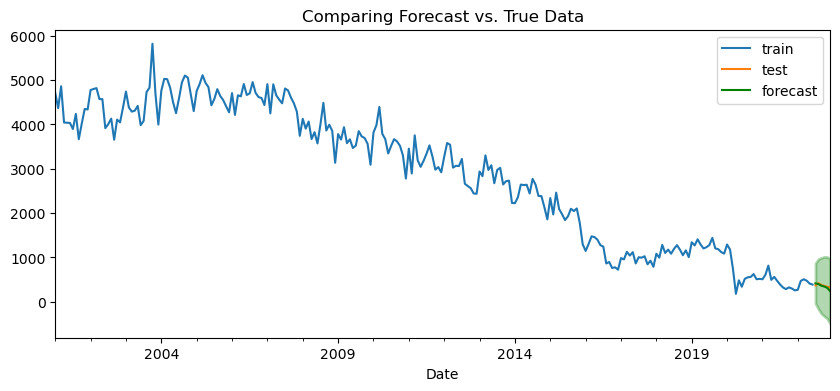

In [108]:
# Obtain summary of forecast as dataframe
forecast_df_auto = auto_sarima.get_forecast(len(test)).summary_frame()
# Plot the forecast with true values
plot_forecast(train, test, forecast_df_auto)
# Evaluate Model Performance
regression_metrics_ts(test, forecast_df_auto["mean"])

#### Select the final model 

Manual model metrics AIC and BIC diagnostic :


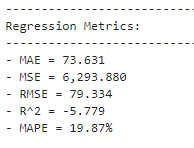  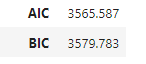



Tuned model metrics & AIC and BIC diagnostic : 

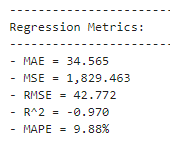  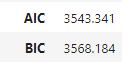


The tuned model has better metrics and lower AIC and BIC values. Also visually, the tuned model perform better.

#### Make true future forecasts using the entire dataset

In [110]:
# Fit a final model on the entire time series

final_p = 4
final_q = 1
final_d = 0
final_P = 1
final_Q = 0
final_D = 1
m = 12

# Fit the ARIMA model
final_model = tsa.ARIMA(
    ts_narcotics,
    order=(final_p, final_d, final_q),
    seasonal_order=(final_P, final_D, final_Q, m),
).fit()

C:\Users\user\anaconda3\envs\dojo-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


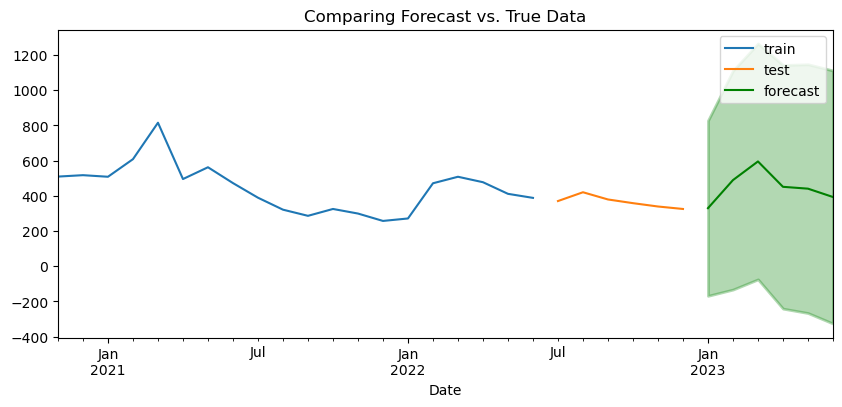

In [111]:
# Ger forecast into true future (fit on entrie time series)
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df, n_train_lags = 20);

In [113]:
# Define starting and final values
starting_value = forecast_df['mean'].iloc[0]
final_value = forecast_df['mean'].iloc[-1]
# Change in x
delta = final_value - starting_value
print(f'The predicted net change in the number of Narcotics crime from the beginning of the forecast to the end {delta: .2f}.')
perc_change = (delta/starting_value) *100
print (f'The percentage change is {perc_change :.2f}%.')

The predicted net change in the number of Narcotics crime from the beginning of the forecast to the end  63.43.
The percentage change is 19.25%.


### Final Evaluation

Of the two crimes, which is forecasted to have the highest monthly count of crimes at the end of the forecast?
Of the two crimes, which is forecasted to have the highest net change by the end of the forecast?


Of the two crimes, which is forecasted to have the highest percent change by the end of the forecast

   - Theft crimes have the highest monthly count, net change and percent change?

### Final Recommendations

- What recommendation would you make to the stakeholders?

It is necessary to dedicate more resources to address and prevent theft crimes. This could include increasing the number of specialized police officers, improving surveillance technologies, or providing additional funds for investigations and prevention programs.

This is based on our forecast that shows that theft crimes have highest monthly count. Also, our analysis show that the theft crimes had the highest crimes counts occured over previous years (image below) and the highest crimes counts occured in AM & PM rush hours. 

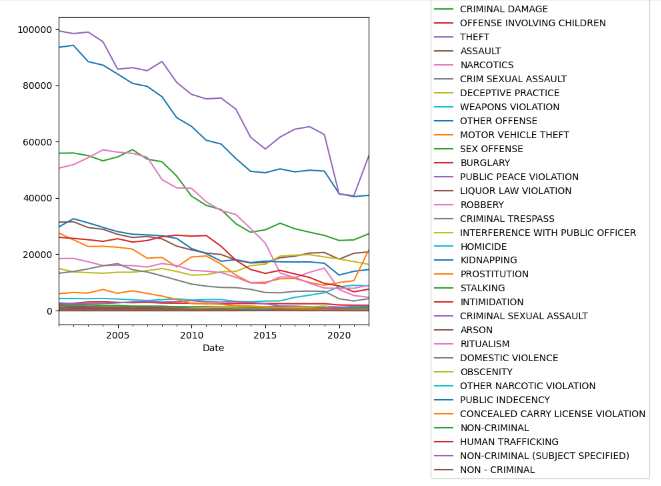